In [139]:
import numpy as np
import random
import math
from statistics import mean, variance, correlation, covariance
from tqdm import tqdm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

## Exercício

1) Gerar uma série do PE
2) Plotar a FAC da série
3) Calcular a média e variância amostral com boostraping

In [53]:
random.seed(4)

## (i)  $ y_t = \epsilon_t + \epsilon_{t-1}$

- $ E(y_t) = 0 $
- $ Var(y_t) = 2\sigma ^2$
- $ \rho(1) = \frac{1}{2}$   
  $ \rho(k) = 0,  k\neq1 $


In [56]:
T = 120
σ = random.random()*10

et = np.array([random.gauss(0, σ) for i in range(T+1)])
yt = et[1:] + et[:-1]

yt.shape

(120,)

### Série temporal

O gráfico da série indica que o processo é estacionário

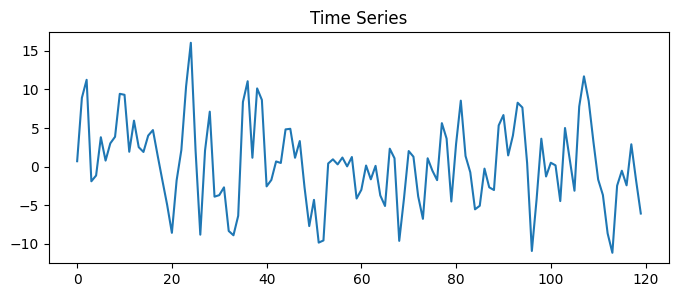

In [57]:
fig, ax = plt.subplots(figsize=(8,3))

ax.plot(np.arange(T), yt)
ax.set_title('Time Series')
plt.show()

### Função de autocorrelação

A função de autocorrelação ficou igual ao calculado

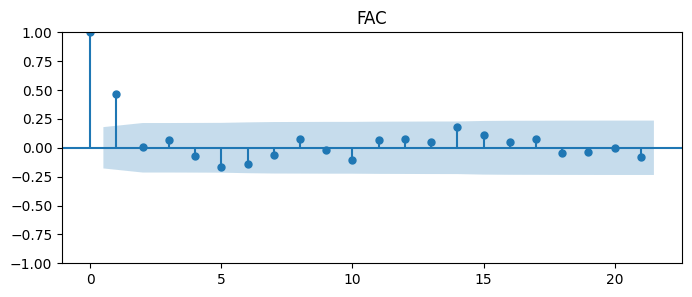

In [61]:
fig, ax = plt.subplots(figsize=(8,3))

plot_acf(yt, ax=ax, title='FAC')

plt.show()

### Estimação da média e variância

A média e a variância amostral estimadas com bootstrap ficaram um pouco diferentes dos valores teóricos do processo.

In [86]:
# cálculo da média e variança usando bootstrap com reposição
means, variances = [], []

for trial in tqdm(range(10_000)):
    resample = random.choices(yt, k=T)
    means.append(mean(resample))
    variances.append(variance(resample))

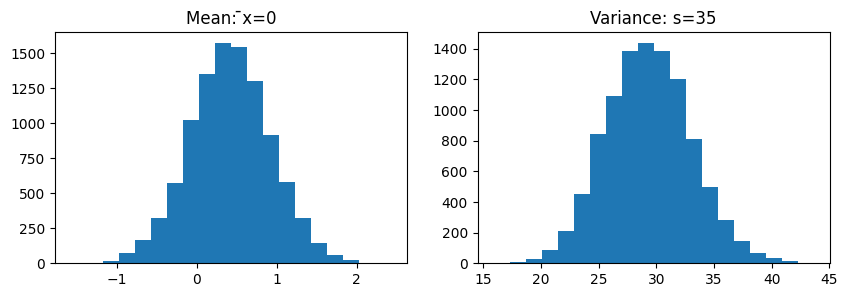

In [102]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].hist(means, bins=20)
ax[1].hist(variances, bins=20)

ax[0].set_title('Mean: ̄x=0')
ax[1].set_title('Variance: s={:.0f}'.format(2*σ**2))
plt.show()

## (ii) $ y_t = \alpha cos\lambda t + \beta sin \lambda t $

$ \alpha,\beta \backsim NID(0,\sigma^2)$

- $ E(y_t) = 0 $
- $ Var(y_t) = \sigma ^2$
- $ \rho(k) = cos\lambda k$   


In [161]:
T = 120
σ = random.random()*10
λ = 0.2*math.pi

α, β = random.gauss(0, σ), random.gauss(0, σ)

t = np.arange(T)
y = α*np.cos(λ*t) + β*np.sin(λ*t)

### Série temporal

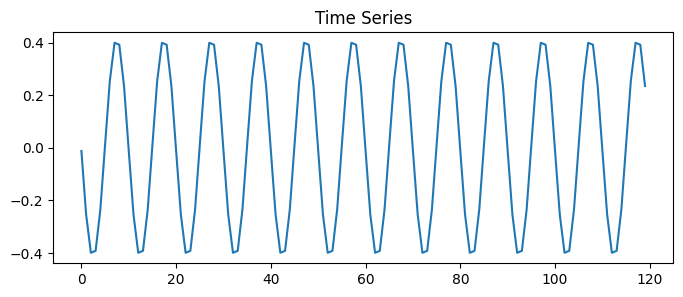

In [162]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(t, y)
ax.set_title('Time Series')
plt.show()

### Função de autocorrelação

A FAC é igual ao coseno calculado

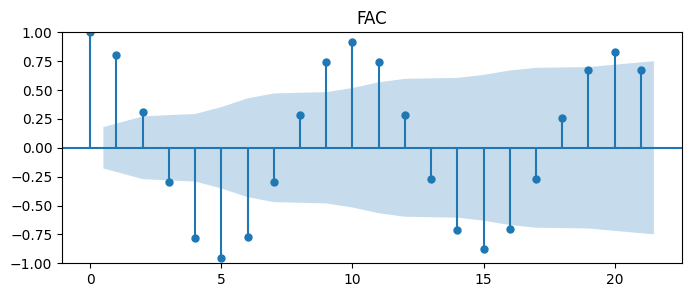

In [154]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(y, ax=ax, title='FAC')
plt.show()

### Estimação da média e variância

In [155]:
# cálculo da média e variança usando bootstrap com reposição
means, variances = [], []

for trial in tqdm(range(10_000)):
    resample = random.choices(y, k=T)
    means.append(mean(resample))
    variances.append(variance(resample))

100%|█████████████| 10000/10000 [00:11<00:00, 847.89it/s]


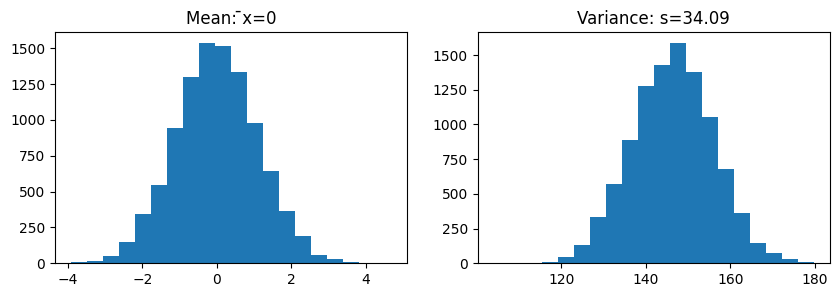

In [156]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].hist(means, bins=20)
ax[1].hist(variances, bins=20)

ax[0].set_title('Mean: ̄x=0')
ax[1].set_title('Variance: s={:.2f}'.format(σ**2))
plt.show()

## (iii) $ y_t = \alpha + y_{t-1} + \epsilon_t $

- $ E(y_t) = y_0 + t\alpha $
- $ Var(y_t) = t\sigma ^2$
- $ \rho(k, t) = (1-\frac{k}{t})^\frac{1}{2}$   


In [132]:
T = 120
σ = random.random()*100
α = 12
y0 = 20

y = [y0]
for i in range(119):
    y.append(α + y[-1] + random.gauss(0,σ))
y = np.array(y)

### Série temporal

O gráfico indica que a série não é estacionária

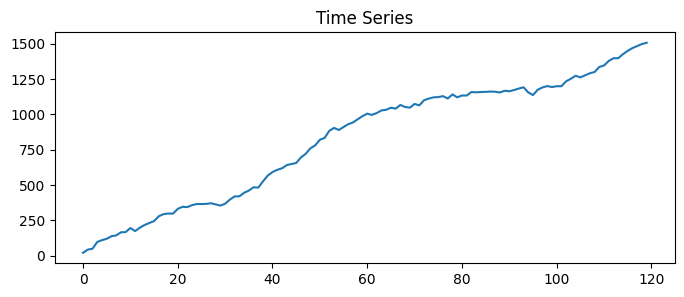

In [133]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(np.arange(T), y)
ax.set_title('Time Series')
plt.show()

### Função de autocorrelação

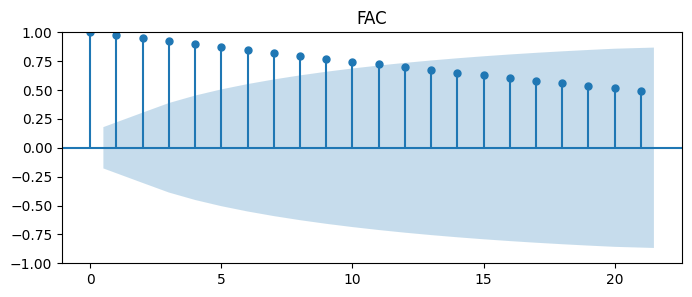

In [134]:
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(y, ax=ax, title='FAC')
plt.show()